In [106]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


df = pd.read_csv("/content/Seattle_Pet_Licenses_20250428.csv")

In [107]:
df

,License Issue Date,License Number,Animal's Name,Species,Primary Breed,Secondary Breed,ZIP Code
0,December 18 2015,S107948,Zen,Cat,Domestic Longhair,Mix,98117.0
1,June 14 2016,S116503,Misty,Cat,Siberian,NaN,98117.0
2,August 04 2016,S119301,Lyra,Cat,Mix,NaN,98121.0
3,August 10 2019,S133113,Spider,Cat,LaPerm,NaN,98115.0
4,November 20 2020,77412,Gemma,Cat,Siamese,American Shorthair,98126.0
...,...,...,...,...,...,...,...
43142,April 07 2025,8063970,Theodore,Dog,"Poodle, Standard","Retriever, Golden",98116.0
43143,April 07 2025,8063973,Freddie,Dog,"Dachshund, Miniature Long Haired",NaN,98122.0
43144,April 08 2025,8053768,Gizmo,Dog,Shih Tzu,Mix,98103.0
43145,April 08 2025,8037664,Lenny,Dog,"Retriever, Golden",NaN,98105.0


The imported CSV file showcases Pet Licenses in Seattle.
The following columns are:
"License Issue Date", "License Number", "Animals Name", "Species", "Primary Breed", "Secondary Breed", and "Zip Code".

However, we dont need the zip code since we arent dealing with locations (since the dataset is already centralize around seattle)

In [108]:
cats_df = df.drop(['License Number', 'Secondary Breed', 'ZIP Code'], axis=1)
#shows the first few rows
print(cats_df.head())

  License Issue Date Animal's Name Species      Primary Breed
0   December 18 2015           Zen     Cat  Domestic Longhair
1       June 14 2016         Misty     Cat           Siberian
2     August 04 2016          Lyra     Cat                Mix
3     August 10 2019        Spider     Cat             LaPerm
4   November 20 2020         Gemma     Cat            Siamese


Also, we only want to see cats, so we will be excluding the "dog" specieis.

As a bonus, I also included how many cats there are in the pet licensing csv (using len).

In [109]:
cats_df = cats_df[df['Species'] == 'Cat']

#showing first few rows
print(cats_df.head())

#showinng overall count of cats
print(len(cats_df))

  License Issue Date Animal's Name Species      Primary Breed
0   December 18 2015           Zen     Cat  Domestic Longhair
1       June 14 2016         Misty     Cat           Siberian
2     August 04 2016          Lyra     Cat                Mix
3     August 10 2019        Spider     Cat             LaPerm
4   November 20 2020         Gemma     Cat            Siamese
13949


Overall, we can see that there are 13,949 cat licensings in Seattle

In [110]:
cats_df

,License Issue Date,Animal's Name,Species,Primary Breed
0,December 18 2015,Zen,Cat,Domestic Longhair
1,June 14 2016,Misty,Cat,Siberian
2,August 04 2016,Lyra,Cat,Mix
3,August 10 2019,Spider,Cat,LaPerm
4,November 20 2020,Gemma,Cat,Siamese
...,...,...,...,...
13960,April 07 2025,Bug,Cat,Domestic Longhair
13961,April 07 2025,Jasper,Cat,Domestic Shorthair
13962,April 07 2025,Fable,Cat,Domestic Medium Hair
13963,April 07 2025,Tanner,Cat,Domestic Medium Hair


First, we will be answering the first question:

# #1: Whats the most popular Cat breed overall for pet licensing?

<ipython-input-111-8646cd44411b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primary_breed_counts.values, y=primary_breed_counts.index, palette='viridis')


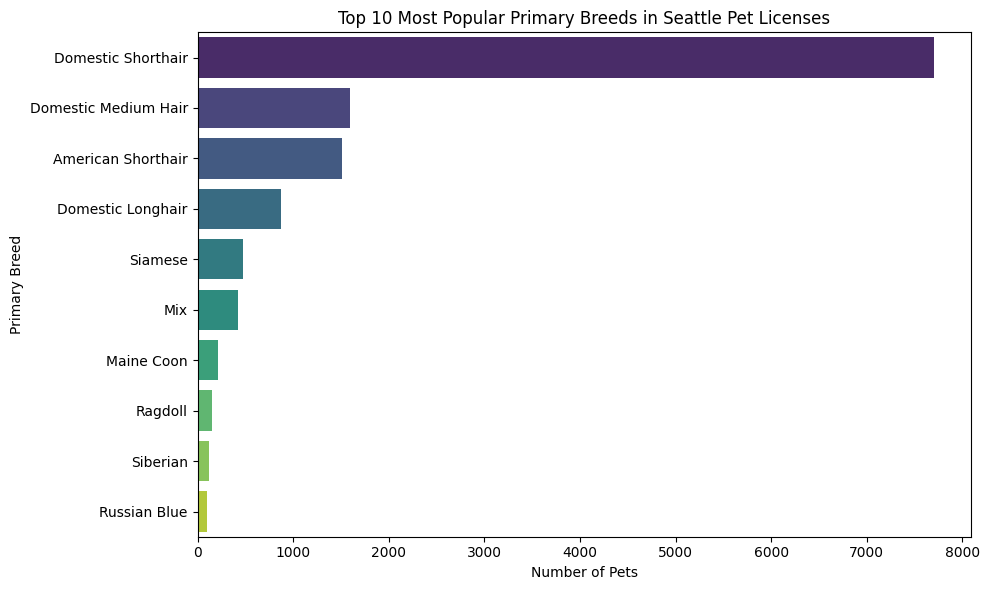

Primary Breed
Domestic Shorthair      7702
Domestic Medium Hair    1595
American Shorthair      1515
Domestic Longhair        869
Siamese                  473
Mix                      427
Maine Coon               217
Ragdoll                  155
Siberian                 123
Russian Blue              99
Name: count, dtype: int64


In [111]:
primary_breed_counts = cats_df['Primary Breed'].value_counts().head(10)

#plots the top 10 most popular primary breeds
plt.figure(figsize=(10, 6))
sns.barplot(x=primary_breed_counts.values, y=primary_breed_counts.index, palette='viridis')
plt.xlabel('Number of Pets')
plt.ylabel('Primary Breed')
plt.title('Top 10 Most Popular Primary Breeds in Seattle Pet Licenses')
plt.tight_layout()
plt.show()

#shows the counts
print(primary_breed_counts)

**Why is the shorthair breed most popular for licensig?**

There are numerous factors for why this is the case.
But, this is most likely becaause of the low(er) maintenance required for breeds with shorter hair, in contrast to longhairs (which is significantly lower).

Now for a new techique of my choice, creating a pie chart!

Similar to the bar chart above, but the pie chart shows distribution of percentages amongst the caat breeds (out of 100).
This is a different form of visualization that pretty much sums up the previous question, but in a different format.

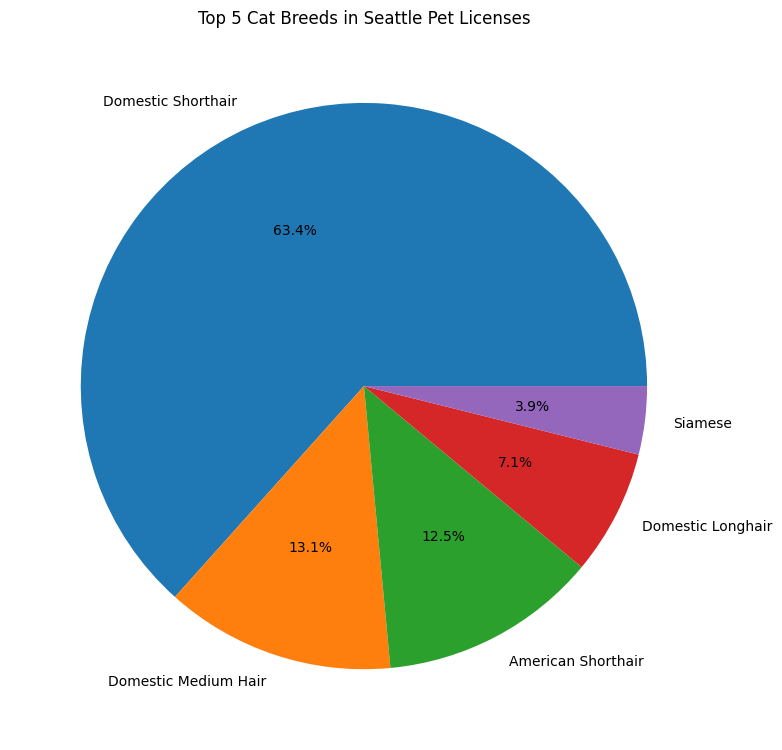

In [112]:
#the pie chart
top5 = cats_df['Primary Breed'].value_counts().head(5)
labels = top5.index.tolist()
sizes = top5.values.tolist()

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=sns.color_palette(n_colors=len(labels)))
plt.title('Top 5 Cat Breeds in Seattle Pet Licenses')
plt.tight_layout()
plt.show()

Our second question, now, is the following:

# #2: What year was the most licenses issured?

Below, is a table comparing number of pet licenses per year.

In [113]:
#converting date
cats_df['License Issue Date'] = pd.to_datetime(cats_df['License Issue Date'])

#gathering the year
cats_df['Issue Year'] = cats_df['License Issue Date'].dt.year

#counting licenses per year
year_counts = cats_df['Issue Year'].value_counts().sort_index()

#show the counts in table format
print("Number of licenses per year:")
print(year_counts)

Number of licenses per year:
Issue Year
2015       1
2016       2
2019       1
2020       1
2021      16
2022      38
2023    3474
2024    8261
2025    2155
Name: count, dtype: int64


Below, You can see a significant increase in cat licenses in recent years, especially in 2023 and 2024. This helped showcase the trend, evidently.

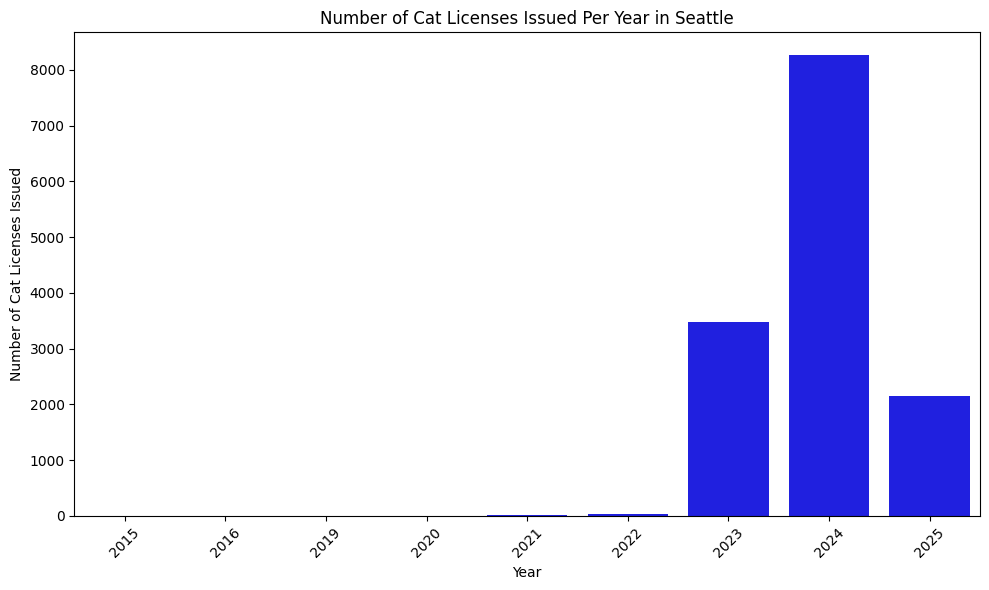

In [114]:
years = year_counts.index.astype(int)
counts = year_counts.values

#the plot
plt.figure(figsize=(10,6))
sns.barplot(x=years, y=counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Cat Licenses Issued')
plt.title('Number of Cat Licenses Issued Per Year in Seattle')
plt.xticks(rotation=45)
plt.tight_layout()

**Why was there a peak specifically in 2024?**

well, its not just Seattle, but similar trend will show throughout the U.S.

While reasons are a result of numerous factors, the following link elucidates that the spike is a result of Gen Z and millenials, whose ownership of cats increased by around 45% in 2024, proving that its not solely Seattle, but a reflection of the broader population (https://www.petfoodindustry.com/pet-food-market/market-trends-and-reports/news/15741428/report-pet-ownership-expands-as-gen-z-shifts-trends#:~:text=Gen%20Z%20is%20leading%20pet,Gen%20Z%2C%20are%20acquiring%20pets.)


Lastly,

# #3: What is the overall trend throughout the years?

Lets include all variables into one. We will be including the progression of each cat breed throughout the years.

This is best shown through creating a line chart (which is below).

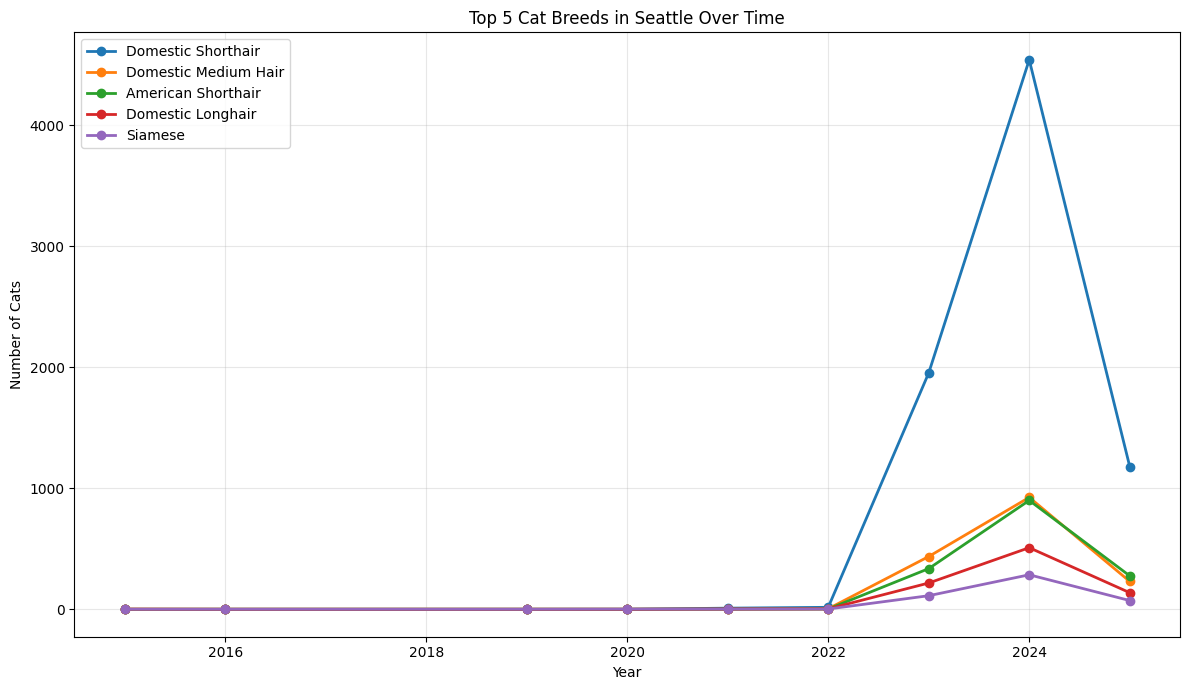

Total numbers for top 5 breeds:
Primary Breed
Domestic Shorthair      7702
Domestic Medium Hair    1595
American Shorthair      1515
Domestic Longhair        869
Siamese                  473
Name: count, dtype: int64


In [115]:
#gathering top 5 breeds
top_5_breeds = cats_df['Primary Breed'].value_counts().nlargest(5).index

#creating table for just top 5 breeds
breed_trends = pd.crosstab(cats_df['Issue Year'], cats_df['Primary Breed'])
top_5_trends = breed_trends[top_5_breeds]

#creating line plot
plt.figure(figsize=(12, 7))
for breed in top_5_breeds:
    plt.plot(top_5_trends.index, top_5_trends[breed], marker='o', linewidth=2, label=breed)

plt.xlabel('Year')
plt.ylabel('Number of Cats')
plt.title('Top 5 Cat Breeds in Seattle Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#showing total numbers for top 5 breeds
print("\
Total numbers for top 5 breeds:")
print(cats_df['Primary Breed'].value_counts().head())

The above visualization shows that Domestic Shorthair cats consistently lead in numbers, with a significant spike in registrations during 2023-2024. The other breeds follow similar patterns but at lower volumes.
Domestic Shorthair dominates!!

# Resources used

I've used prior projects fro this class to get an example of the visualizations used. For example, the line chart for the final visualization was inspired by our CO2 Visualization colab notebook project. Also, creating bar charts were also introduced to us in project 3, when we displayed Whitman first year courses.

Therefore, the resources used were frmm prior projects in this class that were used solely as inspiration.

However, when errors occured from the code, I used ChatGPT to brainstorm ideas in fixing the code. This was only when a roadblock occured in terms of progress. This wasnt used often since there were not much errors in creating the visualization.